<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/PimaIndiansDiabetes/pima.zip

Archive:  /content/drive/MyDrive/PimaIndiansDiabetes/pima.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes.csv            


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)

(576, 8) (576,)


In [ ]:
print(X_test.shape,y_test.shape)

(192, 8) (192,)


In [ ]:
np.unique(y_train,return_counts=True)
# 이진분류 마지막 계층 활성화 함수 sigmoid

(array([0, 1]), array([377, 199]))

In [126]:
model = keras.Sequential()
model.add(Dense(8, input_shape=(8,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [127]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
18/18 [==============================] - 1s 11ms/step - loss: 1.9075 - accuracy: 0.3611 - val_loss: 1.6911 - val_accuracy: 0.4271
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 1.6291 - accuracy: 0.3854 - val_loss: 1.5278 - val_accuracy: 0.4375
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 1.4936 - accuracy: 0.3906 - val_loss: 1.4204 - val_accuracy: 0.4427
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 1.3971 - accuracy: 0.3993 - val_loss: 1.3419 - val_accuracy: 0.4323
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 1.3237 - accuracy: 0.4028 - val_loss: 1.2793 - val_accuracy: 0.4375
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 1.2644 - accuracy: 0.4028 - val_loss: 1.2272 - val_accuracy: 0.4427
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 1.2144 - accuracy: 0.4010 - val_loss: 1.1833 - val_accuracy: 0.4375
Epoch 8/200


In [129]:
import matplotlib.pyplot as plt

In [130]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

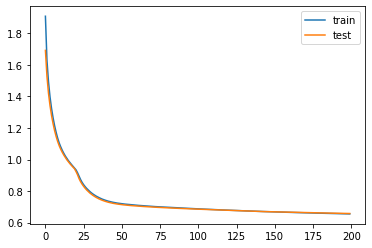

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()

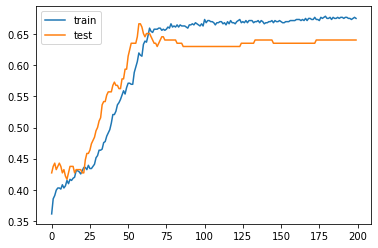

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

In [133]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6406


[0.6578471064567566, 0.640625]